## Seminární práce - Bednářová
### Analýza dat - požáry Brazilských lesů

Obdržená data popisují situaci v letech 1998-2017 po jednotlivých měsících v jednotlivých státech Brazílie.

In [1]:
#import potřebných knihoven
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pylab import rcParams
import seaborn as sb

import scipy as cp
from scipy import interpolate 
from scipy.stats.stats import pearsonr

#načtení dokumentu a výpis prvních 5 řádků
df = pd.read_csv('amazonek.csv')
print(df.head())


   year state    month  number        date
0  1998  Acre  Janeiro     0.0  1998-01-01
1  1999  Acre  Janeiro     0.0  1999-01-01
2  2000  Acre  Janeiro     0.0  2000-01-01
3  2001  Acre  Janeiro     0.0  2001-01-01
4  2002  Acre  Janeiro     0.0  2002-01-01


In [2]:
#zjišťování obsahu a názvu sloupců, výpis unikátních hodnot
print(df.columns)
df.shape
years = list(df.year.unique())
states = list(df.state.unique())
month = list(df.month.unique())
print(years, states, month)


Index(['year', 'state', 'month', 'number', 'date'], dtype='object')
[1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017] ['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara', 'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao', 'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco', 'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina', 'Sao Paulo', 'Sergipe', 'Tocantins'] ['Janeiro', 'Fevereiro', 'Marco', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']


In [3]:
df.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


#### Mapa Brazilie (pro lepší vizualizaci)

![Mapa Brazilie](img/brazil-map-states.jpg)

#### Zjišťování jaký stát, v jakém roce a v jakém měsící drží měsíční rekord pro počet požárů

In [4]:
df.sort_values('number', ascending =False)

,year,state,month,number,date
888,2008,Amazonas,Setembro,998.0,2008-01-01
1105,2006,Bahia,Agosto,995.0,2006-01-01
1410,2012,Ceara,Novembro,995.0,2012-01-01
6346,2009,Tocantins,Julho,989.0,2009-01-01
3745,2017,Paraiba,Agosto,987.0,2017-01-01
6344,2007,Tocantins,Julho,982.0,2007-01-01
3229,1999,Pará,Julho,982.0,1999-01-01
5896,2017,Sao Paulo,Agosto,981.0,2017-01-01
1100,2001,Bahia,Agosto,979.0,2001-01-01
2502,2009,Mato Grosso,Junho,979.0,2009-01-01


### Vývoj během roku, dohromady, pro jednotlivé kraje (top 4)

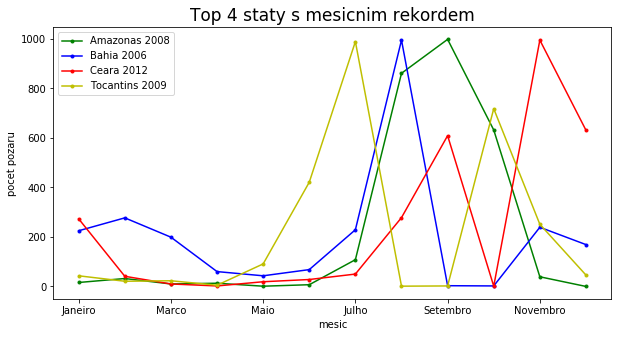

In [5]:
#vizualizace roku top 4 států z předešlé tabulky (státy s rekordním počtem požárů v jednom měsíci)
Amazonas_2008 = df.loc[(df.year == 2008) & (df.state == 'Amazonas')]
Bahia_2006 = df.loc[(df.year == 2006) & (df.state == 'Bahia')]
Ceara_2012 = df.loc[(df.year == 2012) & (df.state == 'Ceara')]
Tocantins_2009 = df.loc[(df.year == 2009) & (df.state == 'Tocantins')]

fig=plt.figure(figsize=(10,5))
plt.plot(Amazonas_2008.month, Amazonas_2008.number, 'g.-')
plt.plot(Bahia_2006.month, Bahia_2006.number, 'b.-')
plt.plot(Ceara_2012.month, Ceara_2012.number, 'r.-')
plt.plot(Tocantins_2009.month, Tocantins_2009.number, 'y.-')

plt.xlabel('mesic')
plt.ylabel('pocet pozaru')
plt.legend(['Amazonas 2008', 'Bahia 2006', 'Ceara 2012', 'Tocantins 2009', 'Paraiba 2017'])
plt.xticks(Bahia_2006.month[::2])

plt.title('Top 4 staty s mesicnim rekordem', fontsize=17)
plt.show()

### Dlouhodobý vývoj, dohromady

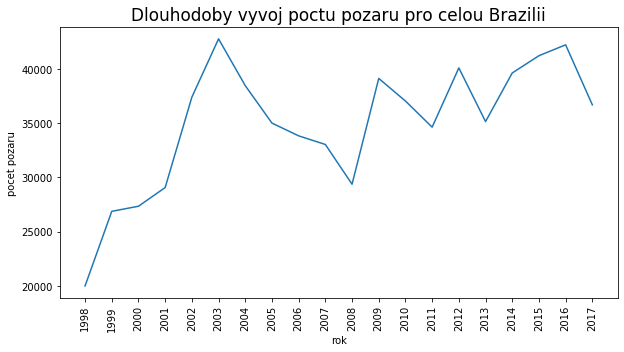

In [6]:
fig=plt.figure(figsize=(10,5))
celkem = pd.DataFrame(df.groupby('year')['number'].sum().reset_index())
sb.lineplot(celkem['year'], celkem['number'])
plt.xlabel('rok')
plt.ylabel('pocet pozaru')
plt.xticks(celkem.year, rotation=90)


plt.title('Dlouhodoby vyvoj poctu pozaru pro celou Brazilii', fontsize=17)
plt.show()

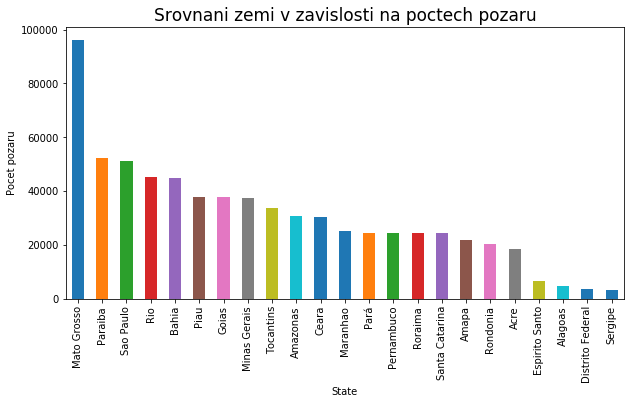

In [7]:
fig=plt.figure(figsize=(10,5))
df[['state','number']].groupby(['state']).number.sum().sort_values(ascending=False).plot(kind = 'bar')
plt.xlabel("State")
plt.ylabel('Pocet pozaru')
plt.title('Srovnani zemi v zavislosti na poctech pozaru', fontsize=17)

plt.show()

## Vizualizace dat pro top 3 země s nejvíce požáry

### Počet požárů v jednotlivých letech, dohromady, pro jednotlivé kraje (top 3)

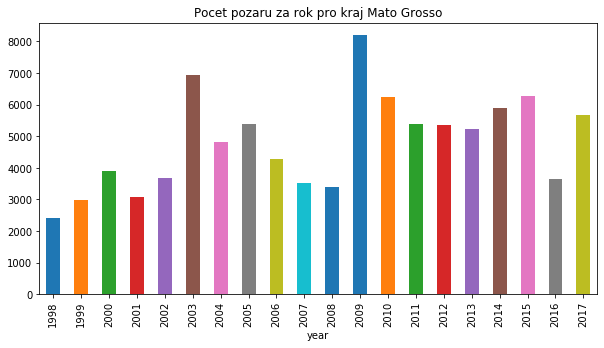

In [8]:
fig=plt.figure(figsize=(10,5))
MG_all = df.loc[df.state == "Mato Grosso"].groupby("year")['number'].sum().plot(kind = 'bar', title = 'Pocet pozaru za rok pro kraj Mato Grosso')

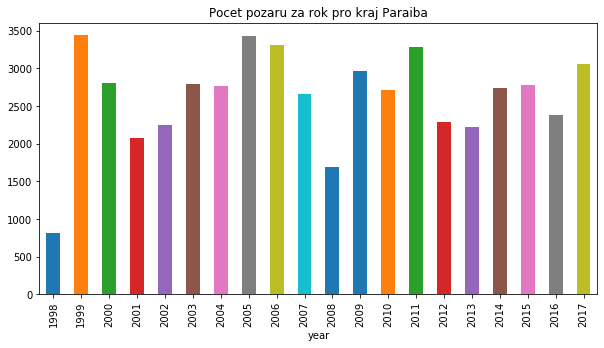

In [9]:
fig=plt.figure(figsize=(10,5))
Paraiba_all = df.loc[df.state == "Paraiba"].groupby("year")['number'].sum().plot(kind = 'bar', title = 'Pocet pozaru za rok pro kraj Paraiba')


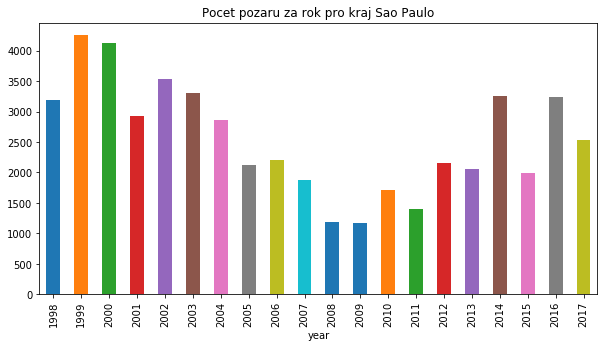

In [10]:
fig=plt.figure(figsize=(10,5))
SP_all = df.loc[df.state == "Sao Paulo"].groupby("year")['number'].sum().plot(kind = 'bar', title = 'Pocet pozaru za rok pro kraj Sao Paulo')


### Průměrný počet požárů v jednotlivých měsících, dohromady, pro jednotlivé kraje (top 3)

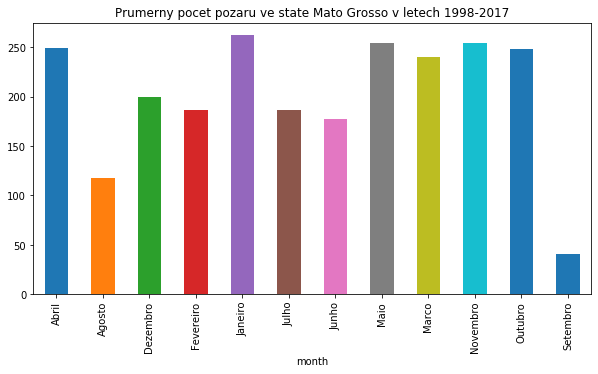

In [11]:
fig=plt.figure(figsize=(10,5))
MG = df.loc[df.state == 'Mato Grosso'].groupby("month")['number'].mean().plot(kind = 'bar', title = 'Prumerny pocet pozaru ve state Mato Grosso v letech 1998-2017')
#mesice jsou v histogramu razeny abecedne, po zameneni mesicu za cisla jsou uz serazeny postupne

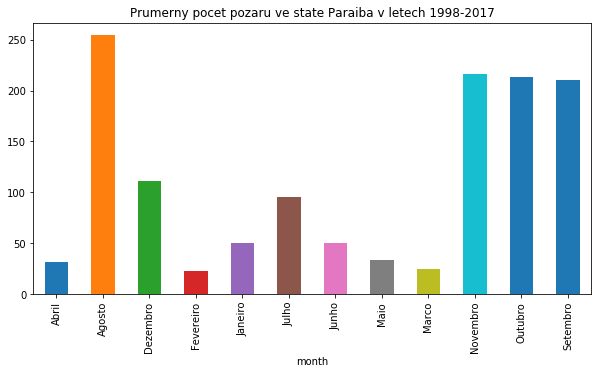

In [12]:
fig=plt.figure(figsize=(10,5))
Paraiba = df.loc[df.state == 'Paraiba'].groupby("month")['number'].mean().plot(kind = 'bar', title = 'Prumerny pocet pozaru ve state Paraiba v letech 1998-2017')

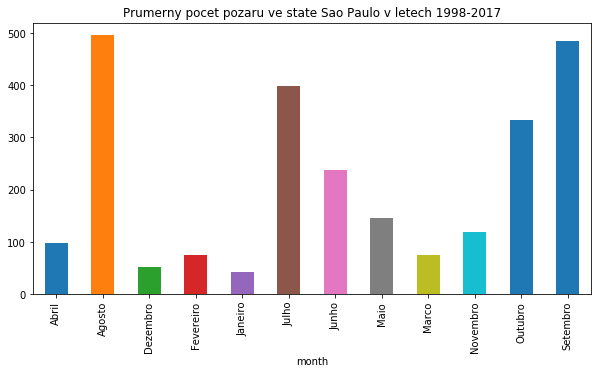

In [13]:
fig=plt.figure(figsize=(10,5))
SP = df.loc[df.state == 'Sao Paulo'].groupby("month")['number'].mean().plot(kind = 'bar', title = 'Prumerny pocet pozaru ve state Sao Paulo v letech 1998-2017')

### Korelace

In [14]:
df.corr(method ='pearson') 

,year,number
year,1.000000,0.065201
number,0.065201,1.000000


### Čištění dat

In [15]:
#zameneni nazvu mesicu za cisla
df = df.replace(to_replace =["Janeiro", "Fevereiro", "Marco", "Abril", "Maio", "Junho", "Julho","Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"],  
                            value =["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"])
#datumy nesouhlasi a neposkytuji zadna cenna data, proto jsou vypusteny
df = df.drop(columns =['date'])
print(df.head)

<bound method NDFrame.head of       year      state month  number
0     1998       Acre    01     0.0
1     1999       Acre    01     0.0
2     2000       Acre    01     0.0
3     2001       Acre    01     0.0
4     2002       Acre    01     0.0
5     2003       Acre    01    10.0
6     2004       Acre    01     0.0
7     2005       Acre    01    12.0
8     2006       Acre    01     4.0
9     2007       Acre    01     0.0
10    2008       Acre    01     0.0
11    2009       Acre    01     0.0
12    2010       Acre    01     1.0
13    2011       Acre    01     0.0
14    2012       Acre    01     0.0
15    2013       Acre    01     0.0
16    2014       Acre    01     0.0
17    2015       Acre    01     1.0
18    2016       Acre    01    12.0
19    2017       Acre    01     0.0
20    1998       Acre    02     0.0
21    1999       Acre    02     0.0
22    2000       Acre    02     0.0
23    2001       Acre    02     0.0
24    2002       Acre    02     1.0
25    2003       Acre    02     0.

In [16]:
#vymazani vsech radku, ktere obsahuji cisla, ktera nejsou cela (nelze mit pocet pozaru jako desetinne cislo)
j = 0
for i in range (6454-j):
    if i == 0:
        if (df.number.iloc[i]).is_integer() == False:
            df = df.drop(df.index[i])
    else:
        if (df.number.iloc[i-j]).is_integer() == False:
            df = df.drop(df.index[i-j])
            j = j+1

In [17]:
df.shape
#muzeme videt, ze klesl pocet radku, jen pro kontrolu

(5630, 4)